In [2]:
from gan import gan
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
starwars = gan()
starwars.make_generator()
starwars.make_discriminator()
starwars.model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                6208      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dens

In [4]:
import pandas as pd
dfile = '../notebooks/subsampled.csv'
df = pd.read_csv(dfile, sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.218025,0.327429,0.061153,-0.313490,-0.083840,0.170947,0.712686,0.126352,0.167447,0.276619,...,-0.164109,0.130676,0.142329,-0.987288,-0.567605,-0.618738,-0.216733,0.331532,0.318277,0.963297
1,0.383499,-0.006561,-0.451410,-0.452365,-0.148724,0.163417,0.652285,0.327991,0.324744,0.219113,...,-0.161374,-0.516011,0.292533,-0.723104,-0.336234,-0.954766,-0.128803,0.444141,0.383425,0.952270
2,0.426076,-0.050295,-0.689354,-0.531850,-0.148613,0.141136,0.565703,0.605060,0.521936,0.218723,...,-0.021378,-1.000000,0.404114,-0.376452,-0.265591,-0.966140,0.824113,0.653471,0.504843,0.929161
3,0.651114,-0.085873,-0.405833,-0.704819,0.038019,0.268122,0.513000,0.653959,0.573359,0.063392,...,-0.257099,-0.865512,0.370643,-0.185680,-0.301610,-0.730932,-0.106824,0.696511,1.000000,0.675593
4,0.850212,-0.217274,0.076044,-0.809618,0.007103,0.293927,0.552851,0.568672,0.597764,-0.038057,...,-0.023600,-0.517605,0.315868,-0.030927,-0.301473,-0.280888,0.052639,0.735776,0.848634,0.409688


In [5]:
print(df.values.T.shape)

(16384, 96)


In [6]:
starwars.X_train = df.values.T

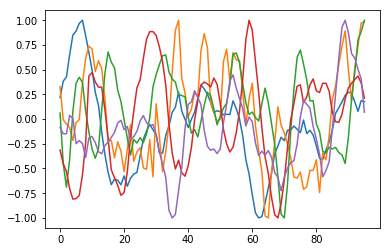

In [7]:
starwars.plot_some_data(nd=5)

In [8]:
starwars.train(epochs=200)

Instructions for updating:
Use tf.cast instead.
Epoch: 0 D loss: 0.7272984385490417 G loss: 0.6511465311050415
Epoch: 10 D loss: 0.6740855574607849 G loss: 0.7889496088027954
Epoch: 20 D loss: 0.6964884400367737 G loss: 0.6560288071632385
Epoch: 30 D loss: 0.7041829228401184 G loss: 0.6547020673751831
Epoch: 40 D loss: 0.7018431425094604 G loss: 0.6859893798828125
Epoch: 50 D loss: 0.6923526525497437 G loss: 0.6887528896331787
Epoch: 60 D loss: 0.6999041438102722 G loss: 0.692556619644165
Epoch: 70 D loss: 0.6978713274002075 G loss: 0.6892738938331604
Epoch: 80 D loss: 0.6882650852203369 G loss: 0.6867043972015381
Epoch: 90 D loss: 0.6957705020904541 G loss: 0.6928727626800537
Epoch: 100 D loss: 0.6927804946899414 G loss: 0.697766125202179
Epoch: 110 D loss: 0.6965920925140381 G loss: 0.6931609511375427
Epoch: 120 D loss: 0.6957739591598511 G loss: 0.6906464099884033
Epoch: 130 D loss: 0.6977651119232178 G loss: 0.6852239370346069
Epoch: 140 D loss: 0.6976739168167114 G loss: 0.6920927

Fake images shape : (1, 96)


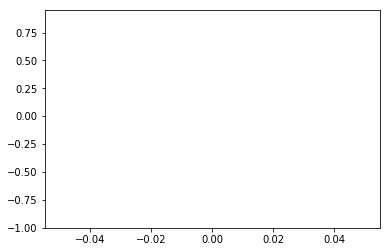

In [9]:
starwars.make_img()
plt.show()

Fake images shape : (5, 96)


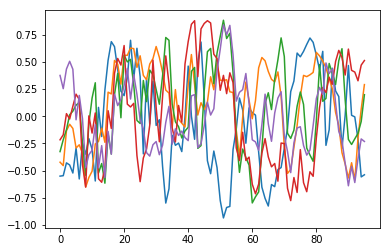

In [10]:
nd = 5
noise = starwars.noise(nd)
fake_images = starwars.gen_model.predict(noise)
print(f'Fake images shape : {fake_images.shape}')
fig, ax = plt.subplots()
ax.plot(fake_images.T)

In [ ]:
# 